In [1]:
import sqlite3
import pandas as pd

try:
    sqlite_connection = sqlite3.connect('data/checking-logs.sqlite.sqlite')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
print('УСПЕШНО')

УСПЕШНО


In [2]:
request = "select uid, datetime from pageviews where uid like 'user_%'"
df = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['datetime'])
df

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


In [35]:
request = "select uid, timestamp from checker where uid like 'user_%'"
commits = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [36]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['timestamp'] = pd.to_datetime(commits['timestamp'].dt.time.astype(str), format='%H:%M:%S.%f')

In [41]:
commits['daytime'] = pd.cut\
(
    commits.timestamp, [pd.to_datetime(h, unit='h', origin=pd.Timestamp('1900-01-01')) 
    for h in [0, 4, 10, 17, 24]], right=False,
    labels=['night', 'morning', 'afternoon', 'evening'], include_lowest=True
)
commits

,uid,timestamp,date,daytime
0,user_4,1900-01-01 05:19:02.744528,2020-04-17,morning
1,user_4,1900-01-01 05:22:35.249331,2020-04-17,morning
2,user_4,1900-01-01 05:22:45.549397,2020-04-17,morning
3,user_4,1900-01-01 05:34:14.691200,2020-04-17,morning
4,user_4,1900-01-01 05:34:24.422370,2020-04-17,morning
...,...,...,...,...
3202,user_1,1900-01-01 20:19:06.872761,2020-05-21,evening
3203,user_1,1900-01-01 20:22:41.785725,2020-05-21,evening
3204,user_1,1900-01-01 20:22:41.877806,2020-05-21,evening
3205,user_1,1900-01-01 20:37:00.129678,2020-05-21,evening


In [38]:
df = commits.groupby('daytime').date.value_counts().unstack(0)


In [39]:
df

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,NaN,NaN,12.0,13.0
2020-04-21,NaN,NaN,NaN,25.0
2020-04-22,NaN,NaN,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,NaN,NaN,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


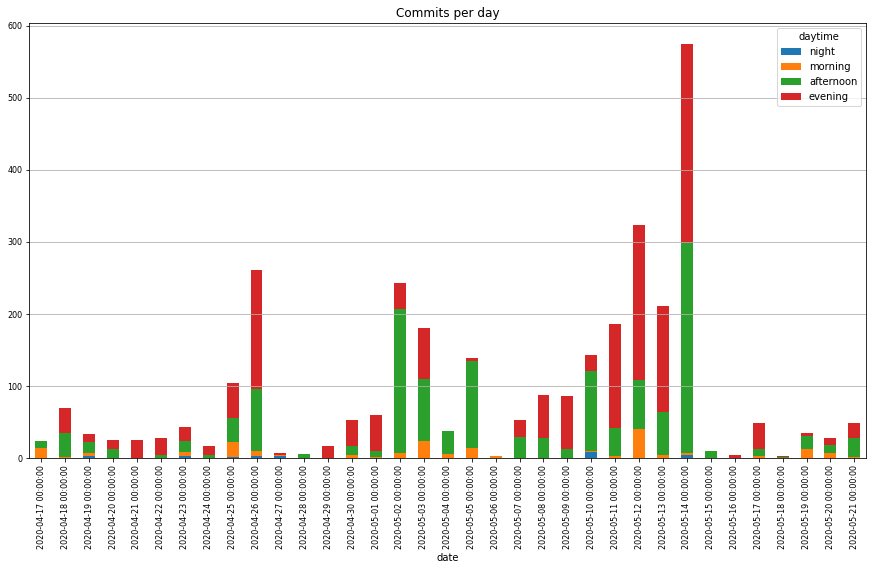

In [40]:
graph = df.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day', rot=90, fontsize=8)
graph.grid(axis='y')


“When do our users usually commit the labs: in the night, morning, afternoon,
or evening?”, the answer is the two most common periods.
◦Which day has:
∗the most number of commits
∗and at the same time, the number of commits in the evening is higher
than in the afternoon?

In [25]:
df.loc[df['evening'] > df['afternoon']].sum(axis=1).idxmax()

Timestamp('2020-05-12 00:00:00')

In [26]:
df.sum()

daytime
night          21.0
morning       184.0
afternoon    1391.0
evening      1611.0
dtype: float64

1) afternoon, evening
2) 2020-05-12

In [ ]:
sqlite_connection.close()